In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_train=pd.read_csv('data_train.csv')
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
Unnamed: 0    891 non-null int64
pclass        891 non-null object
survived      891 non-null int64
name          891 non-null object
sex           891 non-null object
age           702 non-null float64
sibsp         891 non-null int64
parch         891 non-null int64
ticket        891 non-null object
fare          891 non-null float64
cabin         200 non-null object
embarked      891 non-null object
boat          320 non-null object
body          80 non-null float64
home.dest     504 non-null object
dtypes: float64(3), int64(4), object(8)
memory usage: 104.5+ KB


In [6]:
data_train

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,54,1st,1,"Carter, Master. William Thornto",male,11.0,1,2,113760,120.000000,B96 B98,Southampton,4,NaN,"Bryn Mawr, PA"
1,914,3rd,0,"Karlsson, Mr. Julius Konrad Eug",male,33.0,0,0,347465,7.854200,NaN,Southampton,NaN,NaN,NaN
2,146,1st,1,"Harper, Mrs. Henry Sleeper (Myn",female,49.0,1,0,PC 17572,76.729202,D33,Cherbourg,3,NaN,"New York, NY"
3,223,1st,0,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.000000,NaN,Southampton,NaN,NaN,Belfast
4,1193,3rd,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.725000,NaN,Queenstown,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,244,1st,0,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.125000,A10,Cherbourg,NaN,NaN,"Winnipeg, MB"
887,732,3rd,0,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.050000,NaN,Southampton,NaN,NaN,London
888,817,3rd,0,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8.050000,NaN,Southampton,NaN,47.0,NaN
889,80,1st,0,"Crafton, Mr. John Bertram",male,NaN,0,0,113791,26.549999,NaN,Southampton,NaN,NaN,"Roachdale, IN"


In [131]:
# 删除第一列序号和尸体编号 因为认为与是否生存相关性不大
data_train=data_train.drop(['Unnamed: 0','body'],axis=1)
data_train.describe()

,survived,age,sibsp,parch,fare
count,891.000000,702.000000,891.000000,891.000000,891.000000
mean,0.373737,30.172483,0.517396,0.374860,32.819683
std,0.484067,14.342531,1.081240,0.874609,47.452511
min,0.000000,0.166700,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,14.458300
75%,1.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,80.000000,8.000000,9.000000,512.329224


# 初步分析

## 乘客的各属性分布

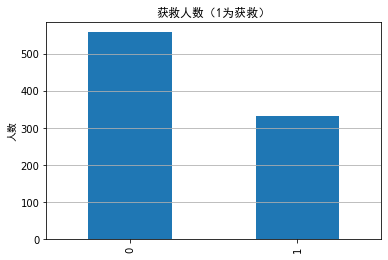

In [23]:
data_train.survived.value_counts().plot(kind='bar')
plt.title('获救人数（1为获救）',fontname='SimHei')
plt.ylabel('人数',fontname='SimHei')
plt.grid(True,axis='y')
plt.show()

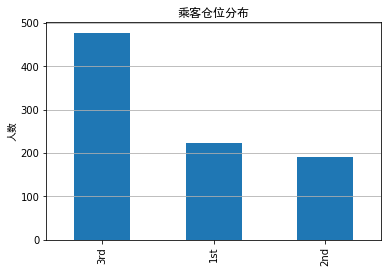

In [24]:
data_train.pclass.value_counts().plot(kind='bar')
plt.title('乘客仓位分布',fontname='SimHei')
plt.ylabel('人数',fontname='SimHei')
plt.grid(True,axis='y')
plt.show()

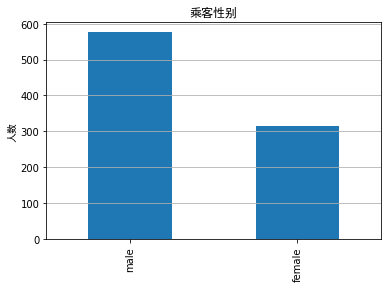

In [25]:
data_train.sex.value_counts().plot(kind='bar')
plt.title('乘客性别',fontname='SimHei')
plt.ylabel('人数',fontname='SimHei')
plt.grid(True,axis='y')
plt.show()

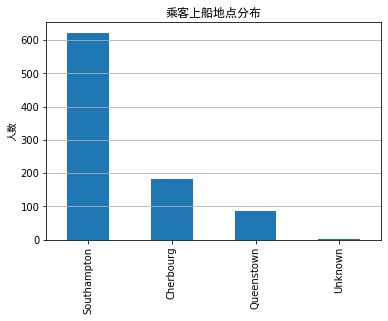

In [26]:
data_train.embarked.value_counts().plot(kind='bar')
plt.title('乘客上船地点分布',fontname='SimHei')
plt.ylabel('人数',fontname='SimHei')
plt.grid(True,axis='y')
plt.show()

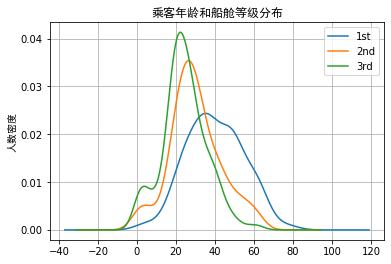

In [38]:
data_train.age[data_train.pclass=='1st'].plot(kind='kde')
data_train.age[data_train.pclass=='2nd'].plot(kind='kde')
data_train.age[data_train.pclass=='3rd'].plot(kind='kde')
plt.legend(('1st','2nd','3rd'))
plt.grid(True)
plt.title('乘客年龄和船舱等级分布',fontname='SimHei')
plt.ylabel('人数密度',fontname='SimHei')
plt.show()

分析：
1.不同仓位的人因为地理位置或者财富权势，可能会影响生存
2.性别会影响生存几率（女人、小孩、老人虽然生理弱，但是救生艇机会优先让给他们）
3.上船地点是否会有影响呢？

## 探究属性和获救之间的关联

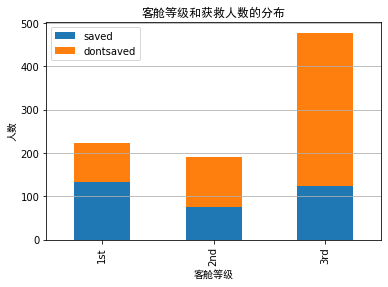

In [48]:

s=data_train.pclass[data_train.survived== 1].value_counts()
ds=data_train.pclass[data_train.survived== 0].value_counts()
p_s=pd.DataFrame({u'saved':s,u'dontsaved':ds})
p_s.plot.bar(stacked=True)
plt.xlabel('客舱等级',fontname='SimHei')
plt.ylabel('人数',fontname='SimHei')
plt.title('客舱等级和获救人数的分布',fontname='SimHei')
plt.grid(True,axis='y')
plt.show()


三级舱的人死亡人数明显多于另外两个等级。客舱等级和生存相关性大。

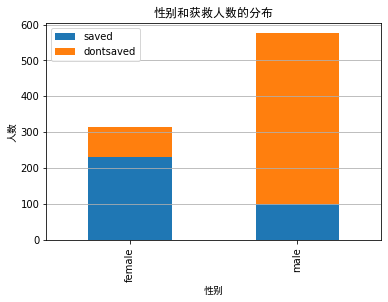

In [49]:

s=data_train.sex[data_train.survived== 1].value_counts()
ds=data_train.sex[data_train.survived== 0].value_counts()
a_s=pd.DataFrame({u'saved':s,u'dontsaved':ds})
a_s.plot.bar(stacked=True)
plt.xlabel('性别',fontname='SimHei')
plt.ylabel('人数',fontname='SimHei')
plt.title('性别和获救人数的分布',fontname='SimHei')
plt.grid(True,axis='y')
plt.show()

女性获救人数远大于男性获救人数，男性死亡人数大于女性死亡人数，性别的相关性很大

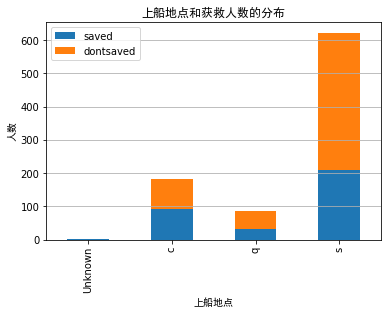

In [6]:

s=data_train.embarked[data_train.survived== 1].value_counts()
ds=data_train.embarked[data_train.survived== 0].value_counts()
e_s=pd.DataFrame({u'saved':s,u'dontsaved':ds})
e_s.plot.bar(stacked=True)
plt.xlabel('上船地点',fontname='SimHei')
plt.ylabel('人数',fontname='SimHei')
plt.title('上船地点和获救人数的分布',fontname='SimHei')
plt.grid(True,axis='y')
plt.show()

s港上船的人死亡率较大，另外两个港口生存和死亡率平均。可以作为特征属性。

In [66]:
sibsp_survived=data_train.groupby(['sibsp','survived']).size()
out=pd.DataFrame(sibsp_survived)
out

0
sibsp survived     
0     0         395
      1         207
1     0         110
      1         110
2     0          16
      1          10
3     0          11
      1           4
4     0          15
      1           2
5     0           4
8     0           7

In [68]:
parch_survived=data_train.groupby(['parch','survived']).size()
out=pd.DataFrame(parch_survived)
out

0
parch survived     
0     0         461
      1         229
1     0          43
      1          66
2     0          42
      1          35
3     0           3
      1           1
4     0           4
      1           1
5     0           2
      1           1
6     0           1
9     0           2

sibsp和parch没看出什么关系

In [69]:
data_train.cabin.value_counts()

C78            4
C23 C25 C27    4
F33            4
D17            3
A34            3
              ..
D11            1
D20            1
C87            1
B50            1
C118           1
Name: cabin, Length: 145, dtype: int64

cabin直接看也看不出啥

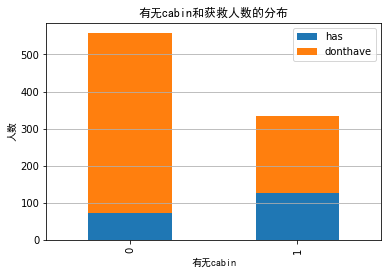

In [3]:
has_cabin=data_train.survived[pd.notnull(data_train.cabin)].value_counts()
donthas_cabin=data_train.survived[pd.isnull(data_train.cabin)].value_counts()
c_s=pd.DataFrame({u'has':has_cabin,u'donthave':donthas_cabin})
c_s.plot.bar(stacked=True) 
plt.xlabel('有无cabin',fontname='SimHei')
plt.ylabel('人数',fontname='SimHei')
plt.title('有无cabin和获救人数的分布',fontname='SimHei')
plt.grid(True,axis='y')
plt.show()

划分了有无cabin后，看出没有cabin的死亡人数多一些

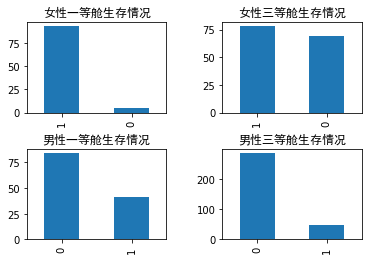

In [36]:
plt.subplot(221)
female_1st=data_train.survived[(data_train.sex=='female')&(data_train.pclass=='1st')].value_counts()
female_1st.plot(kind='bar')
plt.title('女性一等舱生存情况',fontname='SimHei')


plt.subplot(222)
female_3rd=data_train.survived[(data_train.sex=='female')&(data_train.pclass=='3rd')].value_counts()
female_3rd.plot(kind='bar')
plt.title('女性三等舱生存情况',fontname='SimHei')



plt.subplot(223)
male_1st=data_train.survived[(data_train.sex=='male')&(data_train.pclass=='1st')].value_counts()
male_1st.plot(kind='bar')
plt.title('男性一等舱生存情况',fontname='SimHei')



plt.subplot(224)
male_3st=data_train.survived[(data_train.sex=='male')&(data_train.pclass=='3rd')].value_counts()
male_3st.plot(kind='bar')
plt.title('男性三等舱生存情况',fontname='SimHei')

plt.subplots_adjust(wspace =0.4, hspace =0.4)#调整子图间距


plt.show()

这里女性一等舱和女性三等舱的生存情况差别很大，但是后面测试时加入这两个特征也没什么效果，顾没有提及。